## Task - 01
## Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms¶

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Datasets used for the task

In [2]:
# Create a sample DataFrame with the specified columns
data = {
    'price': [300000, 400000, 350000, 450000, 600000],
    'area': [1500, 2000, 1800, 2400, 3000],  # renamed from 'square_footage'
    'bedrooms': [3, 4, 3, 4, 5],
    'bathrooms': [2, 3, 2, 3, 4],
    'stories': [2, 3, 2, 3, 4],
    'mainroad': ['yes', 'no', 'yes', 'no', 'yes'],
    'basement': ['yes', 'no', 'yes', 'no', 'yes'],
    'hotwaterheating': ['no', 'yes', 'no', 'yes', 'no'],
    'parking': [1, 2, 1, 2, 3],
    'prefarea': ['no', 'yes', 'no', 'yes', 'no'],
    'furnishingstatus': ['furnished', 'semi-furnished', 'unfurnished', 'semi-furnished', 'furnished']
}

df = pd.DataFrame(data)

# Define the file path
file_path = r'C:\Users\Admin\Desktop\JN\house_data.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f"File saved at: {file_path}")


File saved at: C:\Users\Admin\Desktop\JN\house_data.csv


In [3]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\JN\house_data.csv')
print(df.head())

    price  area  bedrooms  bathrooms  stories mainroad basement  \
0  300000  1500         3          2        2      yes      yes   
1  400000  2000         4          3        3       no       no   
2  350000  1800         3          2        2      yes      yes   
3  450000  2400         4          3        3       no       no   
4  600000  3000         5          4        4      yes      yes   

  hotwaterheating  parking prefarea furnishingstatus  
0              no        1       no        furnished  
1             yes        2      yes   semi-furnished  
2              no        1       no      unfurnished  
3             yes        2      yes   semi-furnished  
4              no        3       no        furnished  


## Data Inspection

In [4]:
df.shape

(5, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             5 non-null      int64 
 1   area              5 non-null      int64 
 2   bedrooms          5 non-null      int64 
 3   bathrooms         5 non-null      int64 
 4   stories           5 non-null      int64 
 5   mainroad          5 non-null      object
 6   basement          5 non-null      object
 7   hotwaterheating   5 non-null      object
 8   parking           5 non-null      int64 
 9   prefarea          5 non-null      object
 10  furnishingstatus  5 non-null      object
dtypes: int64(6), object(5)
memory usage: 572.0+ bytes


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.000000,5.000000,5.00000,5.00000,5.00000,5.00000
mean,420000.000000,2140.000000,3.80000,2.80000,2.80000,1.80000
std,115108.644332,581.377674,0.83666,0.83666,0.83666,0.83666
min,300000.000000,1500.000000,3.00000,2.00000,2.00000,1.00000
25%,350000.000000,1800.000000,3.00000,2.00000,2.00000,1.00000
50%,400000.000000,2000.000000,4.00000,3.00000,3.00000,2.00000
75%,450000.000000,2400.000000,4.00000,3.00000,3.00000,2.00000
max,600000.000000,3000.000000,5.00000,4.00000,4.00000,3.00000


## Data Cleaning

In [7]:
df.isnull().sum()*100/df.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
basement            0.0
hotwaterheating     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

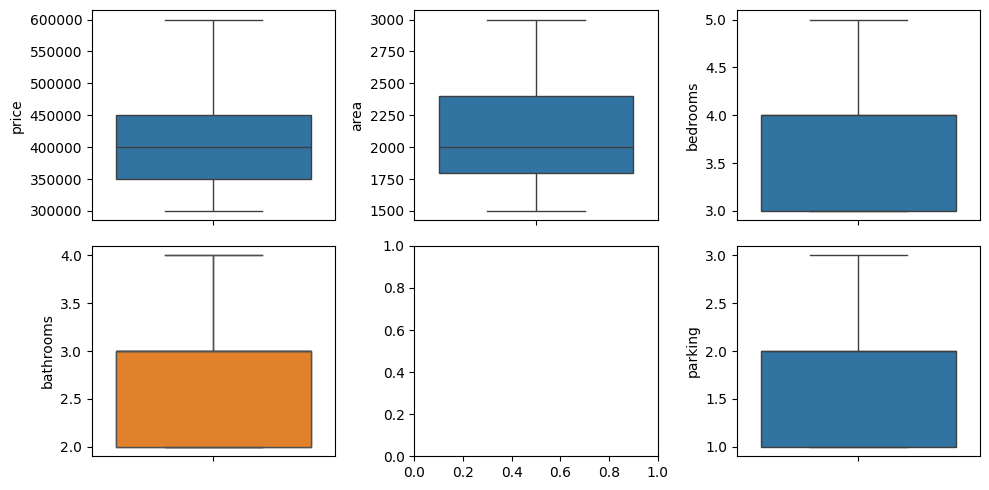

In [8]:
## Analysis
fig, axs=plt.subplots(2,3, figsize=(10,5))
plt1=sns.boxplot(df['price'],ax=axs[0,0])
plt2=sns.boxplot(df['area'],ax=axs[0,1])
plt3=sns.boxplot(df['bedrooms'],ax=axs[0,2])
plt1=sns.boxplot(df['bathrooms'],ax=axs[1,0])
plt2=sns.boxplot(df['stories'],ax=axs[1,0])
plt3=sns.boxplot(df['parking'],ax=axs[1,2])
plt.tight_layout()

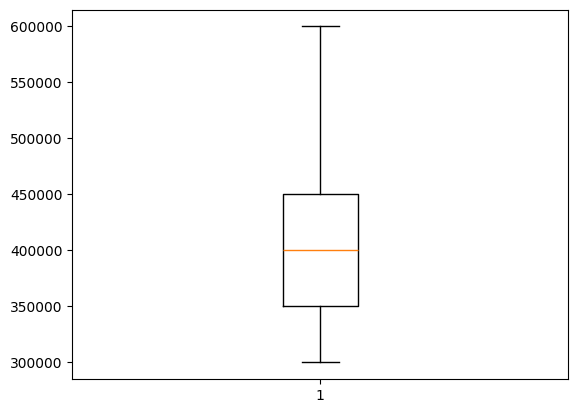

In [9]:
plt.boxplot(df.price)
Q1=df.price.quantile(0.25)
Q3=df.price.quantile(0.75)
IQR=Q3-Q1
df=df[(df.price >= Q1-1.5*IQR) & (df.price <= Q3+ 1.5*IQR)]

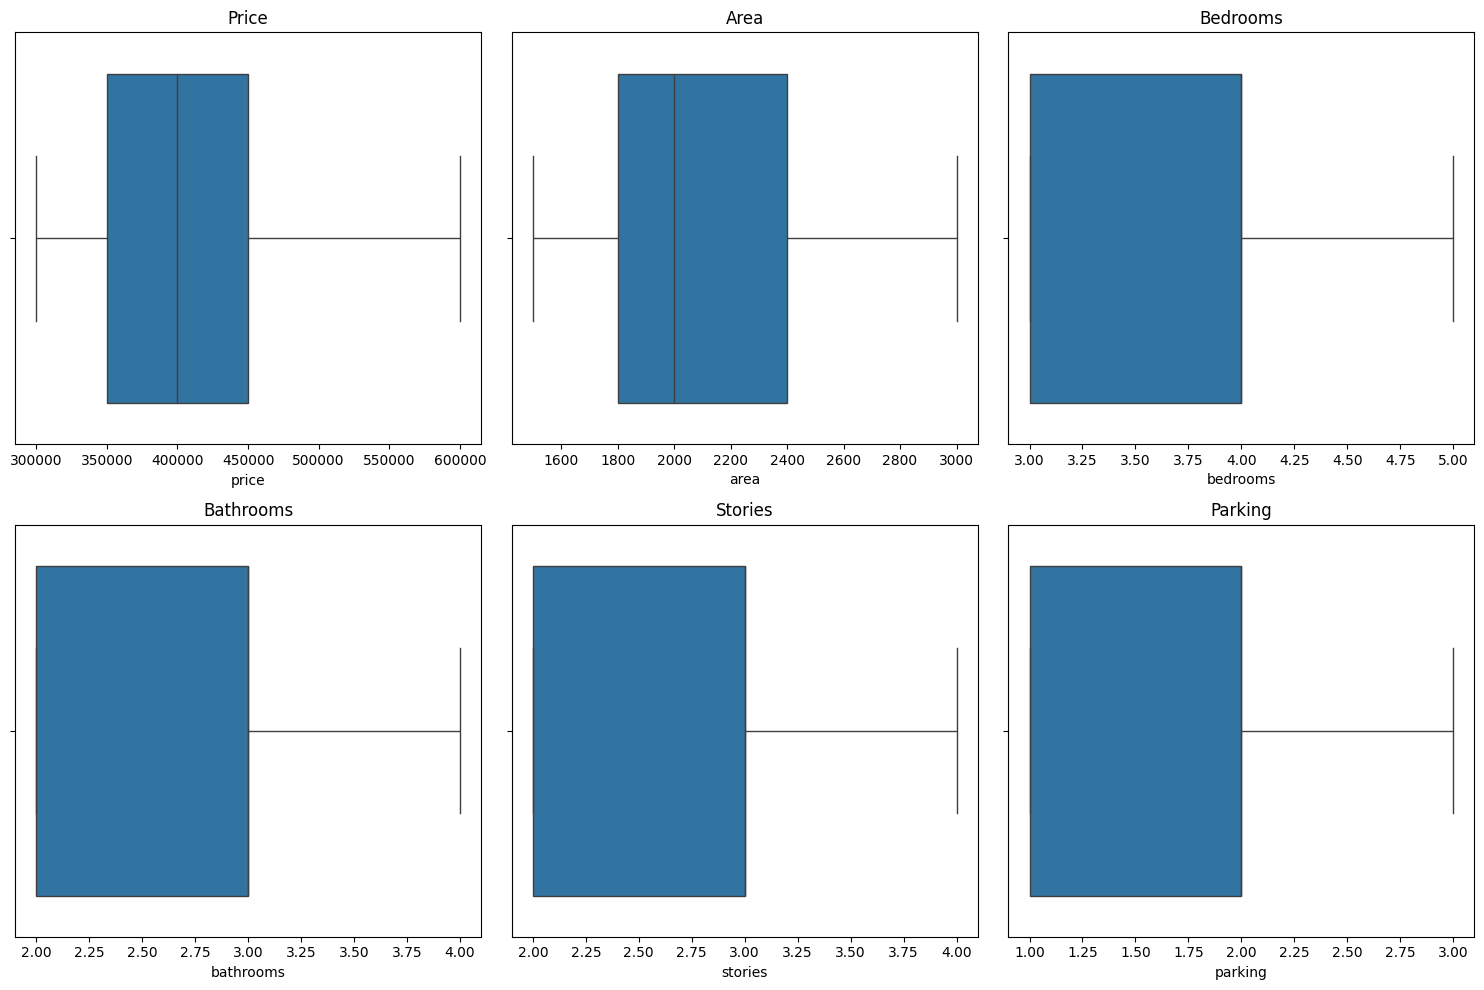

In [10]:
fig, axs=plt.subplots(2,3, figsize=(15,10))

sns.boxplot(x=df['price'], ax=axs[0,0])
sns.boxplot(x=df['area'], ax=axs[0,1])
sns.boxplot(x=df['bedrooms'], ax=axs[0,2])
sns.boxplot(x=df['bathrooms'], ax=axs[1,0])
sns.boxplot(x=df['stories'], ax=axs[1,1])
sns.boxplot(x=df['parking'], ax=axs[1,2])

axs[0,0].set_title('Price')
axs[0,1].set_title('Area')
axs[0,2].set_title('Bedrooms')
axs[1,0].set_title('Bathrooms')
axs[1,1].set_title('Stories')
axs[1,2].set_title('Parking')

# Adjust Layout
plt.tight_layout()

## Data Analysis

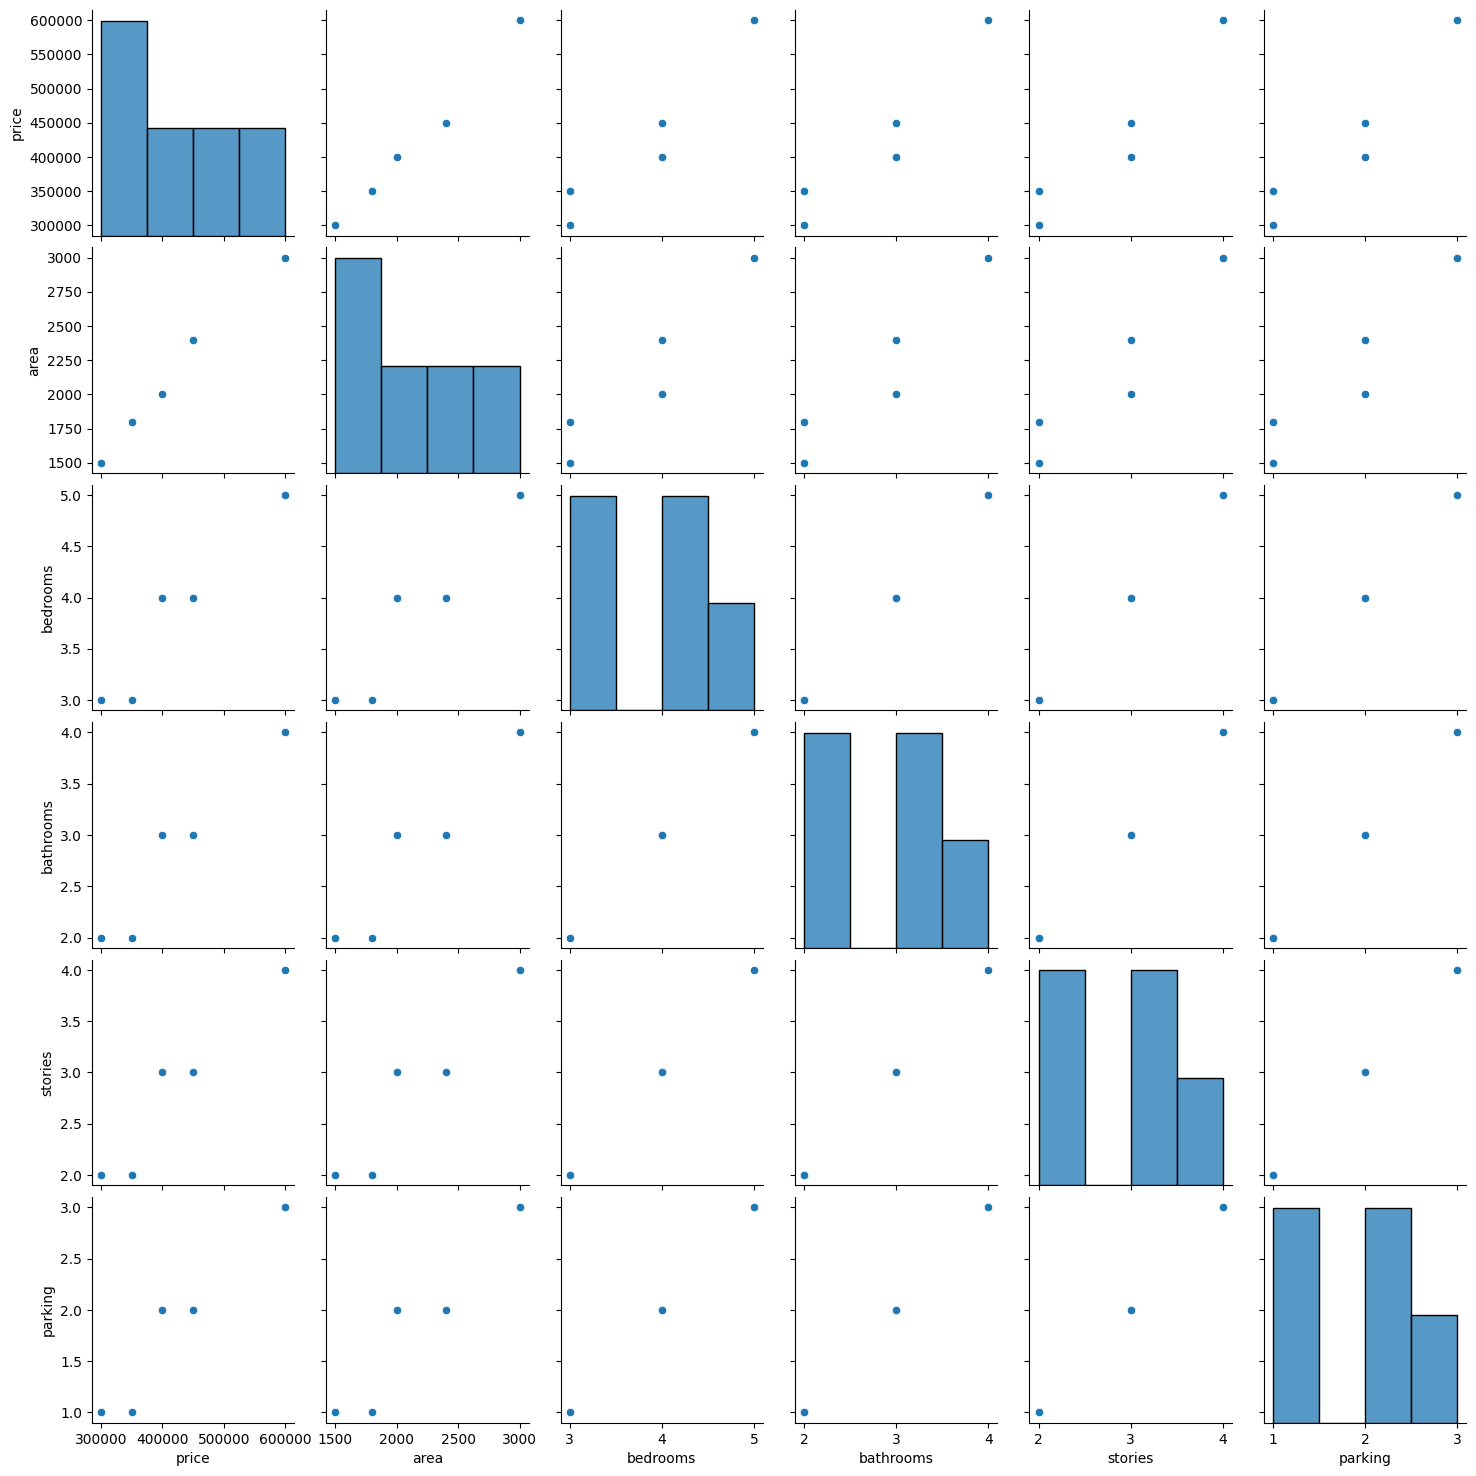

In [11]:
sns.pairplot(df)
plt.show()

## Data Visualization

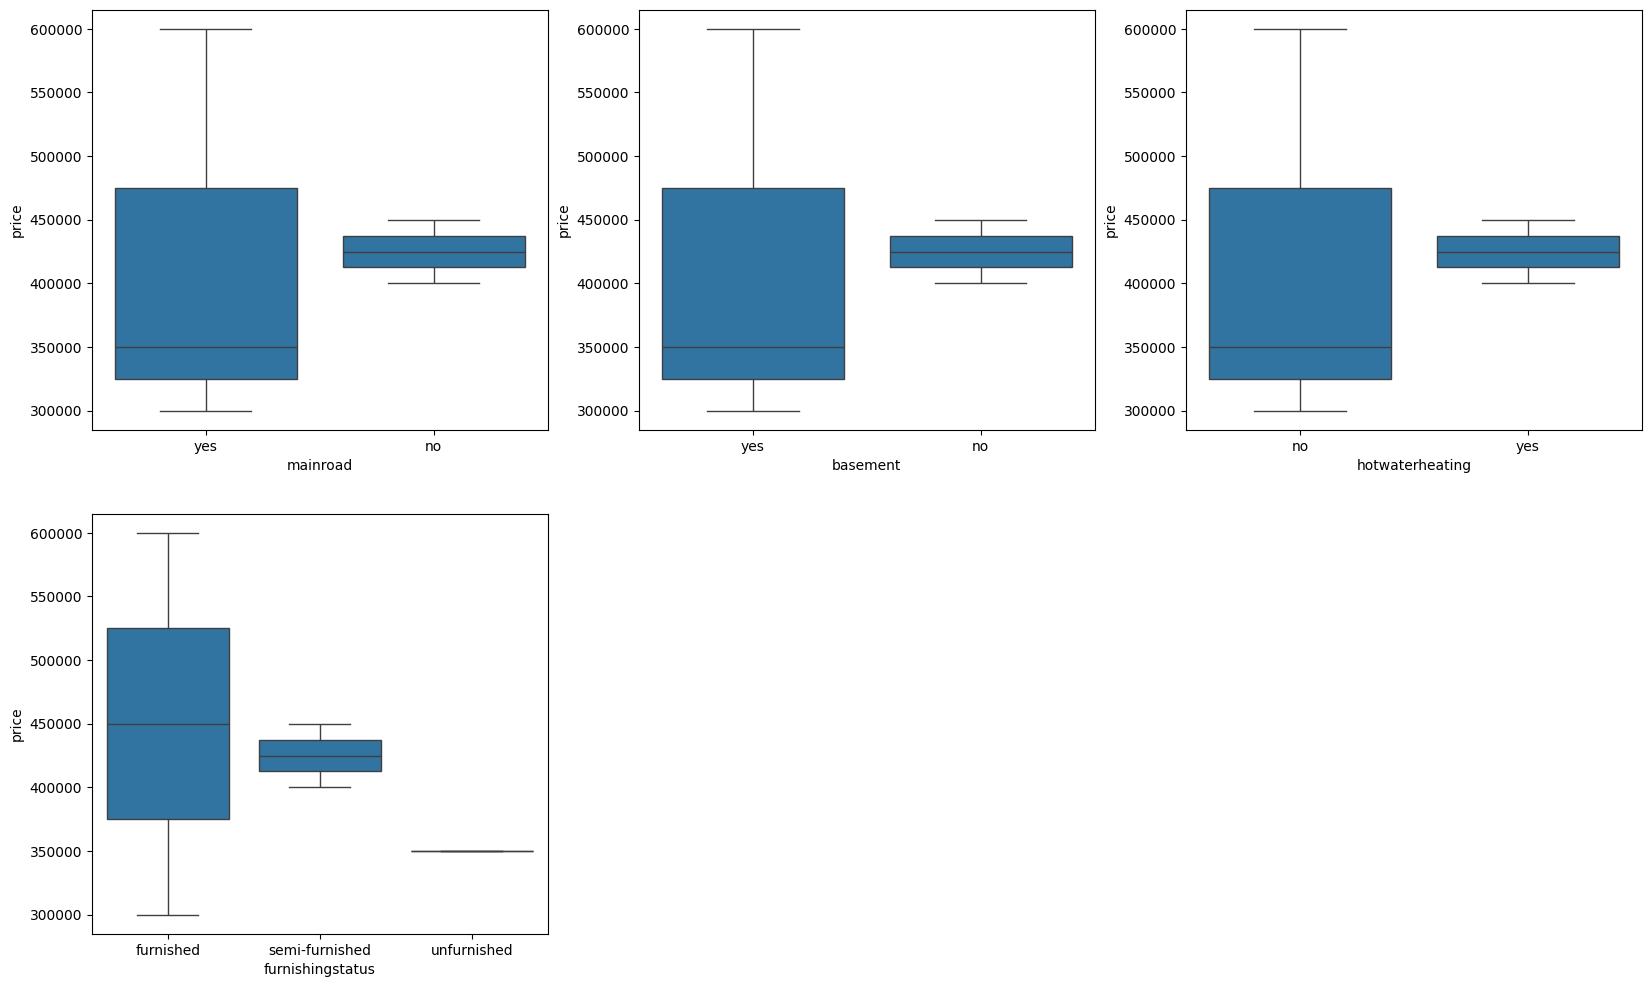

In [12]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x= 'mainroad', y='price', data=df)
plt.subplot(2,3,2)
sns.boxplot(x= 'basement', y='price', data=df)
plt.subplot(2,3,3)
sns.boxplot(x= 'hotwaterheating', y='price', data=df)
plt.subplot(2,3,4)
sns.boxplot(x= 'furnishingstatus', y='price', data=df)
plt.show()

## Data Preparation

In [13]:
varlist=['mainroad', 'basement', 'hotwaterheating', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no":0})
df[varlist] = df[varlist].apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,parking,prefarea,furnishingstatus
0,300000,1500,3,2,2,1,1,0,1,0,furnished
1,400000,2000,4,3,3,0,0,1,2,1,semi-furnished
2,350000,1800,3,2,2,1,1,0,1,0,unfurnished
3,450000,2400,4,3,3,0,0,1,2,1,semi-furnished
4,600000,3000,5,4,4,1,1,0,3,0,furnished


## Data Splitting

In [14]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test=train_test_split(df,train_size=0.7, test_size=0.3, random_state=100)

In [15]:
# Define features and target variable
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Selected Features:  [ True  True  True]
Feature Ranking:  [1 1 1]
Mean Absolute Error: 11111.111111111124
Mean Squared Error: 123456790.12345707
R² Score: nan


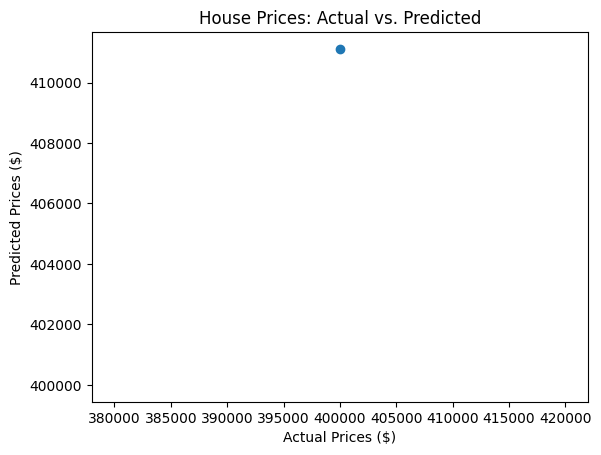

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\Admin\Desktop\JN\house_data.csv')

# Handle missing values (if any)
df.dropna(inplace=True)

# Define features and target variable
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a LinearRegression model
lm = LinearRegression()

# Perform RFE to select features
rfe = RFE(estimator=lm, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)

support = rfe.support_
ranking = rfe.ranking_

print("Selected Features: ", support)
print("Feature Ranking: ", ranking)

# Train the final model with selected features
lm.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = lm.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Function to plot actual vs. predicted prices
def plot_actual_vs_predicted(y_true, y_pred, title="Actual vs. Predicted Prices", xlabel="Actual Prices", ylabel="Predicted Prices"):
    plt.scatter(y_true, y_pred)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red')  # Line for reference
    plt.show()

# Plot the results
plot_actual_vs_predicted(y_test, y_pred, title="House Prices: Actual vs. Predicted", xlabel="Actual Prices ($)", ylabel="Predicted Prices ($)")
